In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
df = pd.read_csv(r"C:\Users\HI\Downloads\netflix_titles.csv\netflix_titles.csv")

# First and last few rows
print(df.head())
print(df.tail(3))

# Dataset info
print(df.info())

# Missing values
print(df.isna().sum())

# Data types
print(df.dtypes)


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [20]:
#Data Cleaning
# Strip whitespace before converting to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
# Fill missing 'director' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')

# Drop rows with missing 'type' or 'title'
df.dropna(subset=['type', 'title'], inplace=True)

# Drop duplicate entries
df = df.drop_duplicates()

In [21]:
# New column: Decade
df['decade'] = (df['release_year'] // 10) * 10

# Group by type and rating
type_rating = df.groupby(['type', 'rating']).size().unstack().fillna(0)
print(type_rating)
df['desc_len'] = df['description'].astype(str).apply(len)
# Pivot Table: Average description length by type & rating
pivot = pd.pivot_table(df, index='type', columns='rating', values='desc_len', aggfunc='mean')
print(pivot)


rating   66 min  74 min  84 min     G  NC-17    NR     PG  PG-13      R  \
type                                                                      
Movie       1.0     1.0     1.0  41.0    3.0  75.0  287.0  490.0  797.0   
TV Show     0.0     0.0     0.0   0.0    0.0   5.0    0.0    0.0    2.0   

rating    TV-14   TV-G   TV-MA  TV-PG   TV-Y  TV-Y7  TV-Y7-FV   UR  
type                                                                
Movie    1427.0  126.0  2062.0  540.0  131.0  139.0       5.0  3.0  
TV Show   733.0   94.0  1145.0  323.0  176.0  195.0       1.0  0.0  
rating   66 min  74 min  84 min           G       NC-17     NR          PG  \
type                                                                         
Movie     148.0   138.0   145.0  143.292683  143.333333  144.2  144.310105   
TV Show     NaN     NaN     NaN         NaN         NaN  140.6         NaN   

rating        PG-13           R       TV-14        TV-G       TV-MA  \
type                                   

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

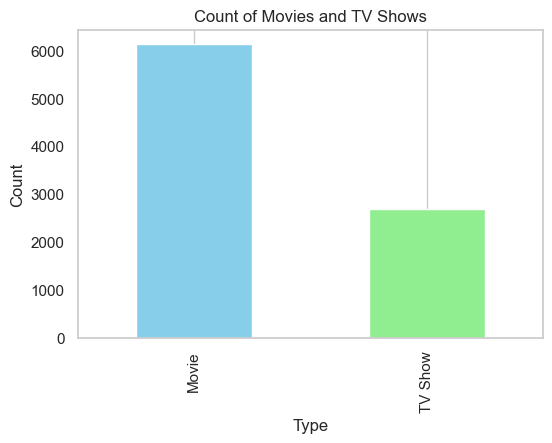

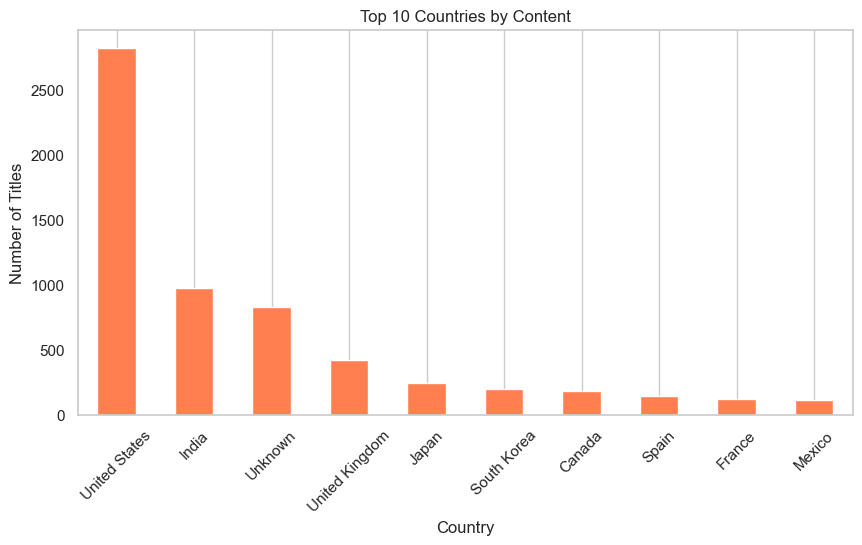

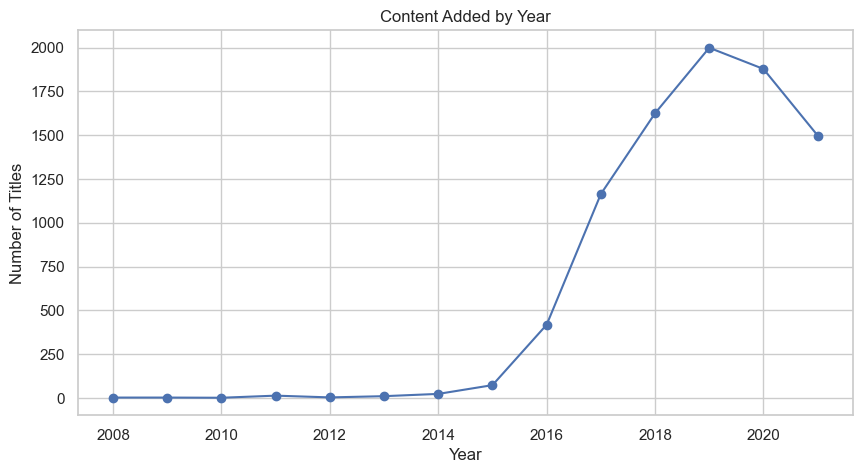

C:\Users\HI\AppData\Local\Temp\ipykernel_11964\3974912662.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='desc_len', palette='Set2')


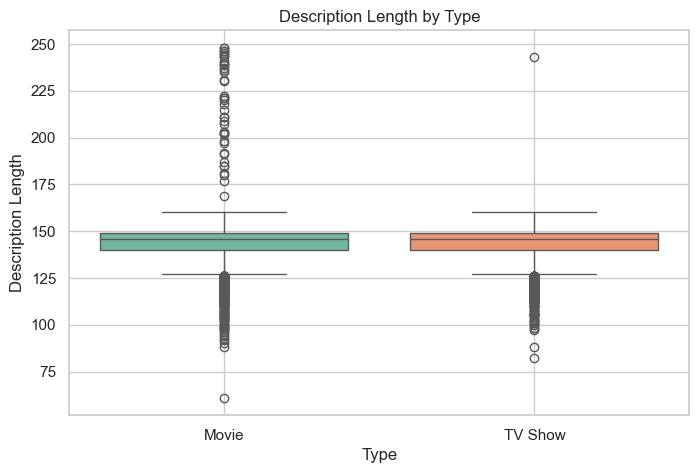

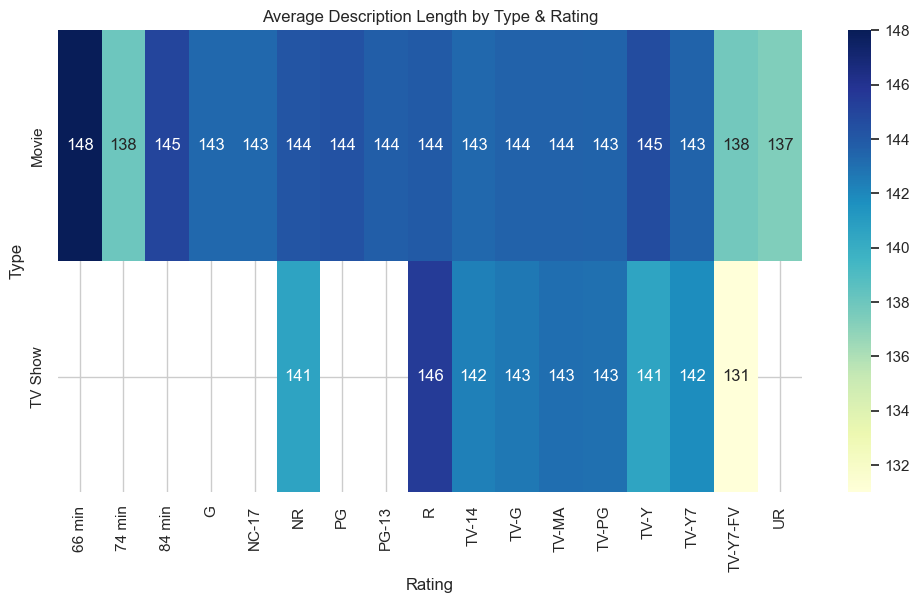

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (use raw string or double backslashes)
df = pd.read_csv(r"C:\Users\HI\Downloads\netflix_titles.csv\netflix_titles.csv")

# Preview
print(df.head())

# --------------------------------------
# Data Cleaning
# --------------------------------------

# Convert 'date_added' to datetime (no .str needed)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Fill missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Add description length column
df['desc_len'] = df['description'].apply(lambda x: len(str(x)))

# --------------------------------------
# Visualizations
# --------------------------------------

# 1. Bar chart: Number of Movies vs TV Shows
plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# 2. Top 10 countries by number of titles
plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Content added over time (line plot)
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

# 4. Description length by type (boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='type', y='desc_len', palette='Set2')
plt.title('Description Length by Type')
plt.xlabel('Type')
plt.ylabel('Description Length')
plt.grid(True)
plt.show()

# 5. Heatmap of avg description length by type & rating
pivot = pd.pivot_table(df, index='type', columns='rating', values='desc_len', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Description Length by Type & Rating')
plt.ylabel('Type')
plt.xlabel('Rating')
plt.show()
